1/27/20 - Going to take the netflix dataset and try to do some visualizations with the data. Want to understand the frequencys of the generes.

In [ ]:
!pip install nltk

In [29]:
import pandas as pd
import numpy as np
import nltk

import category_encoders as ce
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer as tfidf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

import json
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/RickSanchaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/RickSanchaz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/RickSanchaz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# https://www.kaggle.com/shivamb/netflix-shows
netflix_df = pd.read_csv("../../Datasets/daily learn/netflix_titles.csv")

In [3]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


## Explore & Preprocess

First thing we want to do is check to see what missing values our dataset has. While also exploring what type of preprocessing we will need to do

In [4]:
## My goal is mainly focused around the description of the shows so im checking to see if any of them are null
netflix_df.description.isnull().values.any()

False

In [5]:
netflix_df.listed_in.isnull().values.any()

False

Now I know that that my two important columns do not have NAN im going to start to encode my data and preprocess it.

### Preprocessing time!

In [6]:
## How many genre cateogories do we have?
genre_array = netflix_df.listed_in.unique()

In [7]:
## Grab unique genres
unique_genre = []

for genre_set in genre_array:
    row_set = genre_set.split(",")
    for genre in row_set:
        genre = genre.strip()
        if(genre not in unique_genre):
            unique_genre.append(genre)
unique_genre

['Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 "Kids' TV",
 'Crime TV Shows',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Docuseries',
 'Science & Nature TV',
 'Action & Adventure',
 'Dramas',
 'Cult Movies',
 'Independent Movies',
 'Romantic Movies',
 'Documentaries',
 'Horror Movies',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Thrillers',
 'TV Mysteries',
 'British TV Shows',
 'Music & Musicals',
 'Reality TV',
 'TV Action & Adventure',
 'Anime Features',
 'Teen TV Shows',
 'Faith & Spirituality',
 'Korean TV Shows',
 'Anime Series',
 'LGBTQ Movies',
 'TV Horror',
 'Movies',
 'Stand-Up Comedy & Talk Shows',
 'TV Sci-Fi & Fantasy',
 'Classic Movies',
 'Sports Movies',
 'TV Shows',
 'Classic & Cult TV']

In [8]:
print(f"There are a total of {len(unique_genre)} genres in our dataset")

There are a total of 42 genres in our dataset


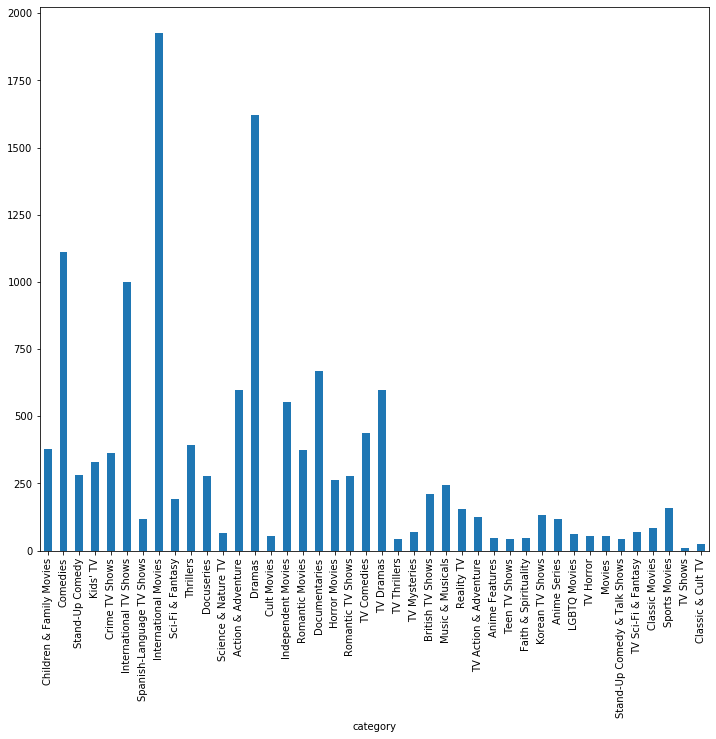

In [41]:
counts = []
for i in unique_genre:
    counts.append((i, len([s for s in netflix_df.genre if i in s])))
df_stats = pd.DataFrame(counts, columns=["category", "num_times"])
df_stats.plot(x="category", y="num_times", kind='bar', legend = False, grid=False, figsize=(12,10), )

In [9]:
def preprocess_data(df):

    df["preprocessed"] = df["description"]

    # Clean the data

    ##EVERYTHING IS LOWER CASE
    df["preprocessed"] = df["preprocessed"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    ##REMOVE PUNCTUATION - REPLACED WITH A SPACE
    df["preprocessed"] = df["preprocessed"].str.replace('[^\w\s]',' ')
    ##REMOVE STOP WORDS
    stop = set(stopwords.words('english'))
    df["preprocessed"] = df["preprocessed"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    ##Tokenization
    TextBlob(df["preprocessed"][0]).words
    ##STEMMING - REMOVES WORD STEMS "ing", 'ly', 's'
    st = PorterStemmer()
    #df["preprocessed"][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    df["preprocessed"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    ##LEMMATIZATION
    df["preprocessed"] = df["preprocessed"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    ##REMOVE COMMON WORDS
    freq = pd.Series(' '.join(df['preprocessed']).split()).value_counts()[:10]
    freq = list(freq.index)
    df["preprocessed"] = df["preprocessed"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    ##REMOVE RARE WORDS
    freq = pd.Series(' '.join(df["preprocessed"]).split()).value_counts()[-10:]
    freq = list(freq.index)
    df["preprocessed"] = df["preprocessed"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    
    return df

In [10]:
preprocess_data(netflix_df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,preprocessed
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,planning awesome wedding grandfather polar bea...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,jandino asporaat riff challenge raising kid se...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",help three human ally autobots protect earth o...
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,prison ship crash unleashes hundred decepticon...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,nerdy high schooler dani finally attracts inte...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,journalist forced crime save father series bas...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",dystopian future insurance adjuster tech compa...
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,fabrizio copano take audience participation ne...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",california 2016 fire season rage brave backcou...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,struggling couple believe luck stash money apa...


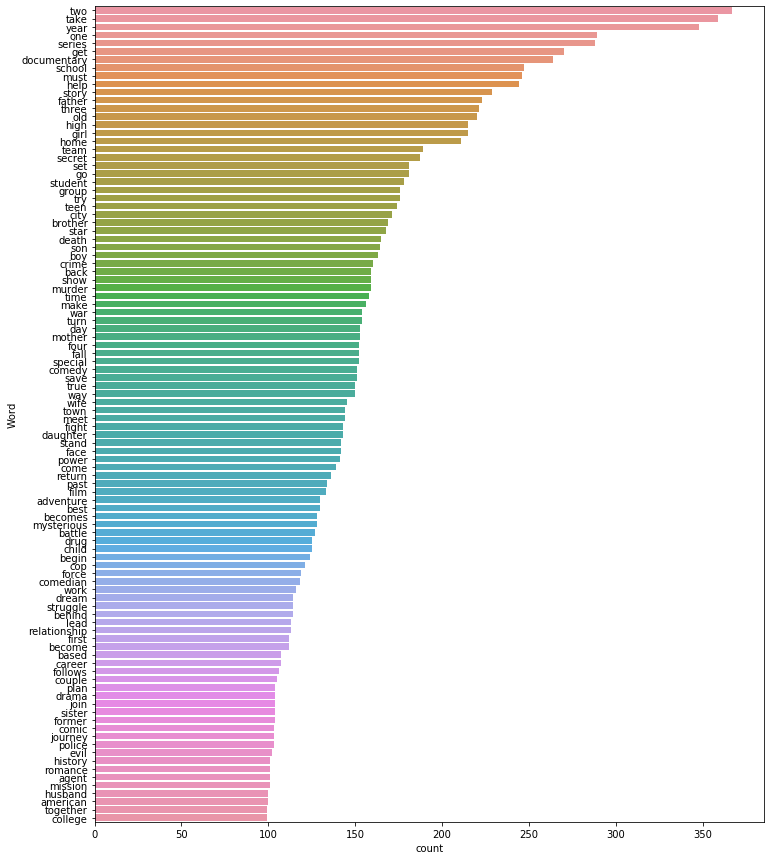

In [42]:
def frequency_words(data, terms = 30):
    all_words = ' '.join([x for x in data.preprocessed])
    all_words = all_words.split()
    
    fdist = nltk.FreqDist(all_words)
    
    words_df = pd.DataFrame({"words": list(fdist.keys()),"count": list(fdist.values())})
    
    d = words_df.nlargest(columns="count" ,n=terms)
    
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "words") 
    ax.set(ylabel = 'Word') 
    plt.show()
    
frequency_words(netflix_df, terms = 100)

In [11]:
netflix_df["genre"] = netflix_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

### Model Building time! Call me Bob the Builder

#### We need to encode our target variable.

In [14]:
mlb = MultiLabelBinarizer()
mlb.fit(netflix_df.genre)

target = mlb.transform(netflix_df.genre)
print(f"Our data Encoded: {target[0]}")
print(f"Not Encoded: {mlb.inverse_transform(target)[0]}")

Our data Encoded: [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
Not Encoded: ('Children & Family Movies', 'Comedies')


#### We create our training and testing dataset

In [15]:
train_x, test_x, train_y, test_y = train_test_split(netflix_df.preprocessed, target, test_size=0.08)

In [16]:
netflix_vecotrizor = tfidf(analyzer="word", stop_words="english",min_df=0.01, max_df=0.8, ngram_range=(1,3))
x_netflix_vecotrizor = netflix_vecotrizor.fit_transform(train_x)
tx_netflix_vecotrizor = netflix_vecotrizor.transform(test_x)

In [19]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

clf.fit(x_netflix_vecotrizor, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [20]:
y_pred = clf.predict(tx_netflix_vecotrizor)

In [ ]:
mlb.inverse_transform(y_pred)

In [22]:
f1_score(test_y, y_pred, average="micro")*100

14.774494556765164

#### Let build an inference Function

In [24]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [25]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [32]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = netflix_vecotrizor.transform([q])
    q_pred = clf.predict(q_vec)
    return mlb.inverse_transform(q_pred)

In [38]:
for i in range(5): 
  k = test_x.sample(1).index[0] 
  print("Movie: ", netflix_df['title'][k], "\nPredicted genre: ", infer_tags(test_x[k])), print("Actual genre: ",netflix_df['genre'][k], "\n")

Movie:  Justice in the City 
Predicted genre:  [('International TV Shows',)]
Actual genre:  ['International TV Shows', 'TV Dramas'] 

Movie:  Hombanna 
Predicted genre:  [('International Movies',)]
Actual genre:  ['Dramas', 'International Movies'] 

Movie:  Lost & Found Music Studios 
Predicted genre:  [('Dramas',)]
Actual genre:  ["Kids' TV", 'TV Comedies', 'TV Dramas'] 

Movie:  Happyish 
Predicted genre:  [()]
Actual genre:  ['TV Comedies', 'TV Dramas'] 

Movie:  Someone Like You 
Predicted genre:  [()]
Actual genre:  ['International TV Shows', 'Romantic TV Shows', 'TV Dramas'] 



In [118]:
genre_count = netflix_df.drop(["show_id", "type", "title", "director", "cast", "country", "date_added", "release_year", "rating", "duration","description", "notes"], axis=1)

#### Going to bring in a new dataset and create an create a new classifer and build a transfer learning approach.

In [45]:
### Data set from CMU
# https://www.cs.cmu.edu/~ark/personas/
movies_metadata_df = pd.read_csv("../../Datasets/daily learn/movies_metadata.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Clean Dataset

In [717]:
movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [46]:
movies_metadata_df.shape

(45466, 24)

In [718]:
# remove unused columns

movies_metadata_df = movies_metadata_df.drop(columns=["adult", "belongs_to_collection", "budget", "homepage", "id", 'imdb_id', 'original_language', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'])

#### Convert genre from a dict to an array then added it to the dataframe

In [719]:
# an empty list
genres = [] 

# extract genres
for i in range(len(movies_metadata_df['genres'])):
    holder = []
    a = json.loads(movies_metadata_df['genres'][i].replace("\'", "\""))
    for z in a:
        holder.append(z["name"])
    genres.append(holder) 

# add to 'movies' dataframe  
movies_metadata_df['genre_new'] = genres

In [720]:
movies_metadata_df = movies_metadata_df[~(movies_metadata_df['genre_new'].str.len() == 0)]

In [721]:
movies_metadata_df = movies_metadata_df.drop(columns=["genres"])
movies_metadata_df = movies_metadata_df.rename(columns={"genre_new":"genre", "overview":"description"})

In [722]:
movies_metadata_df = movies_metadata_df.dropna()

### Preprocessing time!!

In [ ]:
%%time
preprocess_data(movies_metadata_df)

#### Model development time!!

In [780]:
## Create our target variable encoder

mlb = MultiLabelBinarizer()
mlb.fit(movies_metadata_df.genre)

target = mlb.transform(movies_metadata_df.genre)

In [781]:
train_x, test_x, train_y, test_y = train_test_split(movies_metadata_df.preprocessed, target, test_size=0.08)

In [782]:
movies_vecotrizor = tfidf(analyzer="word", stop_words="english",min_df=0.01, max_df=0.8, ngram_range=(1,3))
x_movies_vecotrizor = movies_vecotrizor.fit_transform(train_x)
tx_movies_vecotrizor = movies_vecotrizor.transform(test_x)

In [783]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

clf.fit(x_movies_vecotrizor, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [784]:
y_pred = clf.predict(tx_movies_vecotrizor)

In [785]:
f1_score(test_y, y_pred, average="micro")*100

39.63825283817587